<a href="https://colab.research.google.com/github/TanuRajput110/Seol-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
%matplotlib inline

# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Bike sharing demand prediction -Tanu Rajput/SeoulBikeData.csv',encoding= "ISO-8859-1")

In [ ]:
# peeking at the first five rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# peeking at the last five rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

OBSERVATION: Here the data type of the features, viz., Date, Seasons, Holiday, Functional Day is OBJECT

In [ ]:
# total number of Rows and Columns
df.shape

(8760, 14)

In [ ]:
#the statistical description of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Date,8760,365,01/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


# **Preprocessing** **the** **Data**

In [ ]:
# checking the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# checking duplicate values if any
df.duplicated().sum()

0

**From the data information we saw that date is object datatype, so we have to convert it into date type**

In [ ]:
# converting the datatype of date column from object to date.
df['Date']=pd.to_datetime(df['Date'])

**Now we will create the separate date, month, year by extracting from the date column and then will drop the date column**

In [ ]:
#extract day from date
df['WeekDay']=df["Date"].dt.day_name() 
#extract month from date
df['Month']=pd. DatetimeIndex(df['Date']).month_name()
#extract year from date
df['year']=df['Date'].dt.strftime('%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Dropping the date column as we extracted all formats of date and keep them in separate columns respectively.
df.drop(columns=['Date'],inplace=True)

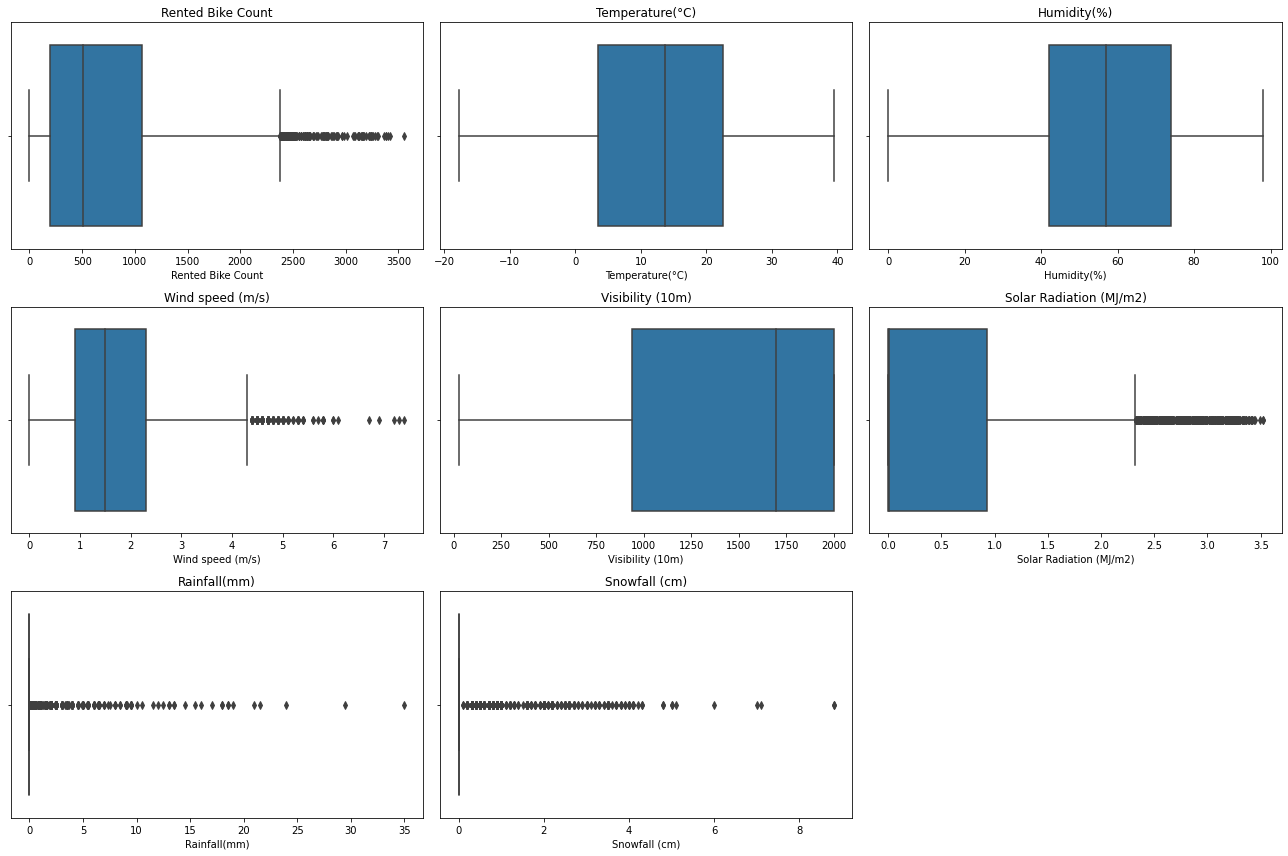

In [ ]:
# checking Outliers with seaborn boxplot
columnss = ['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
n = 1
plt.figure(figsize=(18,12))

for i in columnss:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

We can see the outliers in rainfall and snowfall columns but we don't have to worry about outliers in this data, because if we treat the outliers from Rainfall and snowfall columns,it removes all the information of the data.

**One more datatype is to be change**

-->**HOUR column datatype is of integer. But the date column is of timestamp and 'hour' is the part of timestamp. so it should be the categorical column**

In [ ]:
# converting Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# **EXPLORATORY DATA ANALYSIS & VISUALIZATION**

In [ ]:
# setting the default fig size
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)

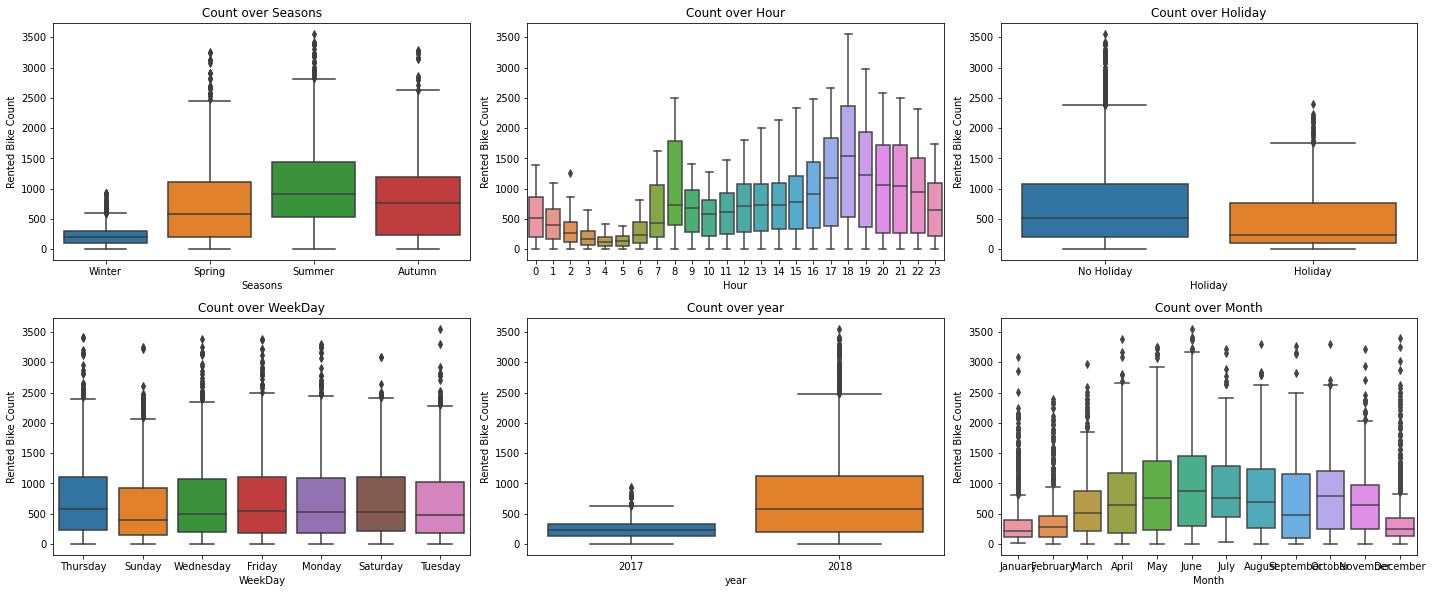

In [ ]:
# Boxplots on Rental Bike Count
cat_columns=['Seasons','Hour','Holiday','WeekDay','year','Month']
n=1
plt.figure(figsize=(20,12))
for i in cat_columns:
 
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(x=df[i],y=df['Rented Bike Count'])
  plt.title(f"Count over {i}")
  plt.tight_layout()
plt.show()

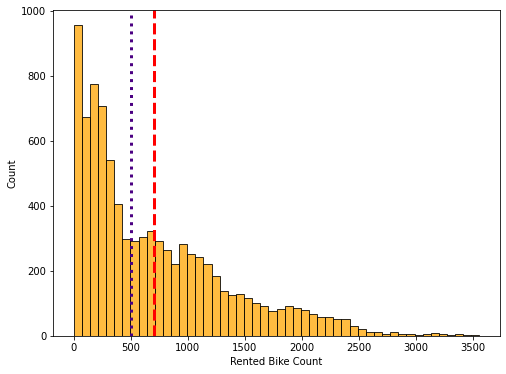

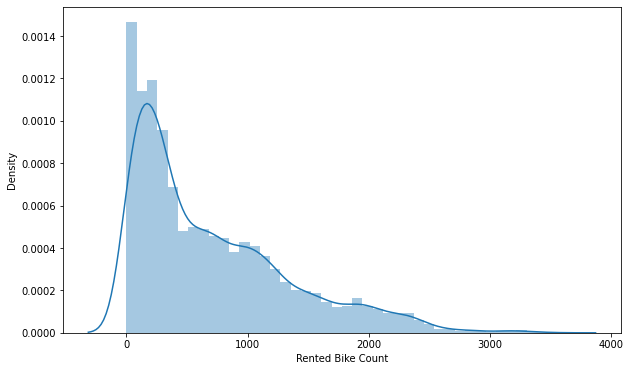

In [ ]:
# Seeing the distribution of target column = 'Rented Bike Count'
plt.figure(figsize=(8,6))
sns.histplot(df['Rented Bike Count'],bins=50, color = 'orange',)
plt.axvline(df['Rented Bike Count'].mean(), color='red', linestyle='dashed', linewidth=3)
plt.axvline(df['Rented Bike Count'].median(), color='indigo', linestyle='dotted', linewidth=3) 
plt.show()
sns.distplot(df['Rented Bike Count'])
plt.show()

**Observation** = The distribution of the Rented Bike Count is skewed to the right

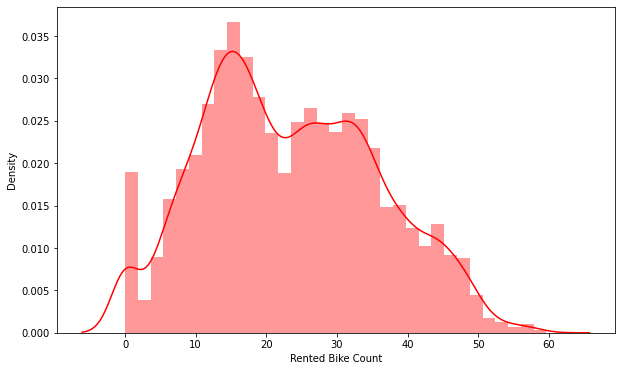

In [ ]:
# normalizing the distribution of target column using square root
sns.distplot(np.sqrt(df['Rented Bike Count']),color='r')
plt.show()

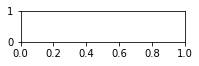

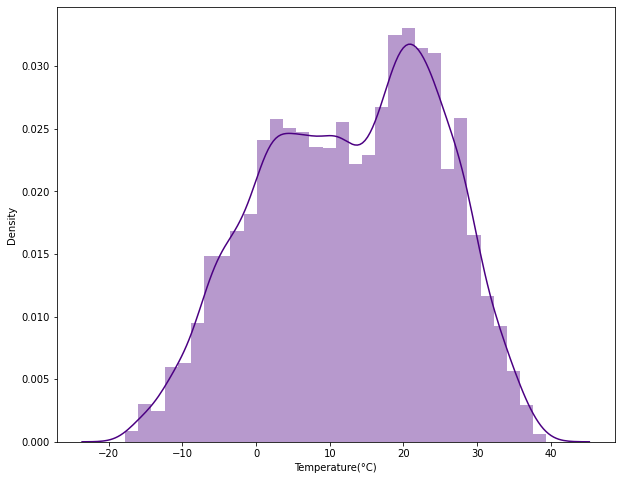

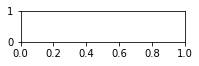

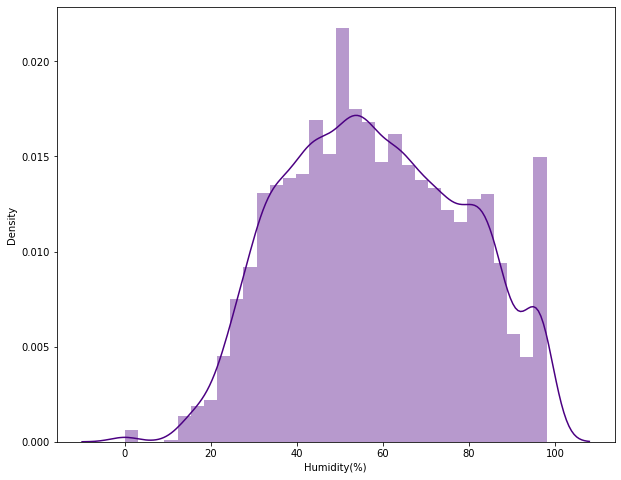

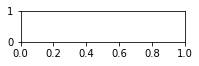

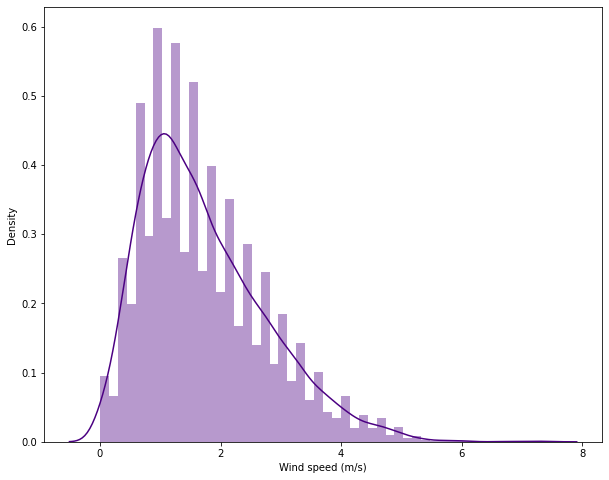

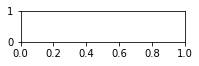

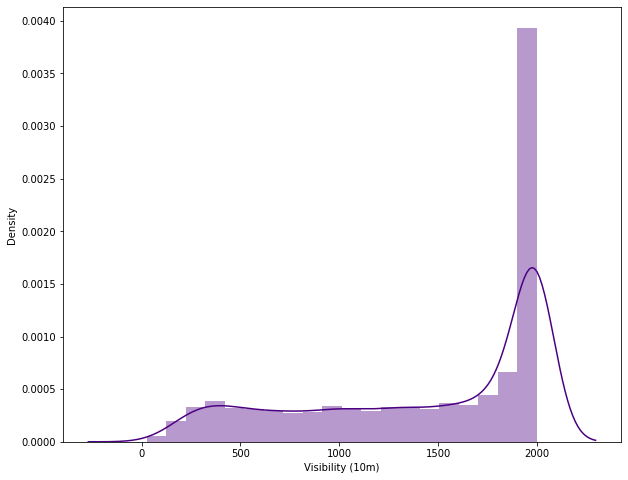

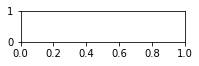

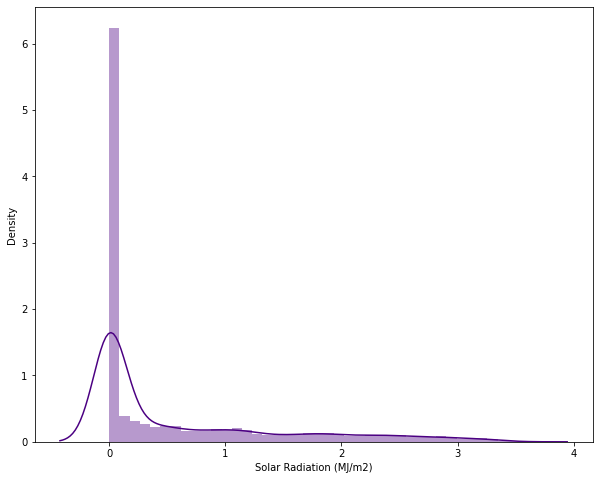

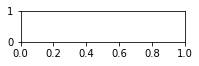

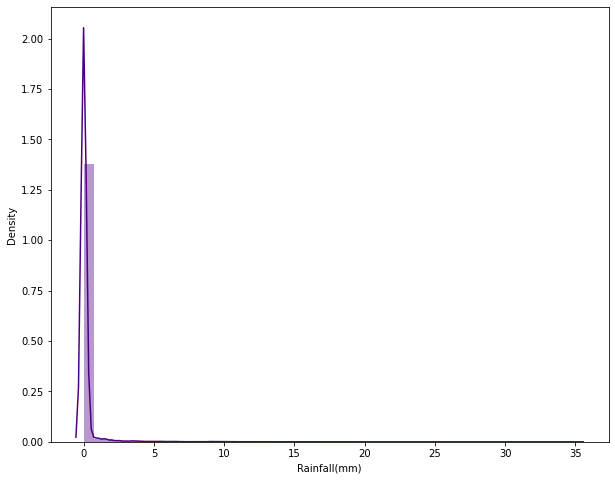

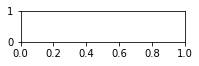

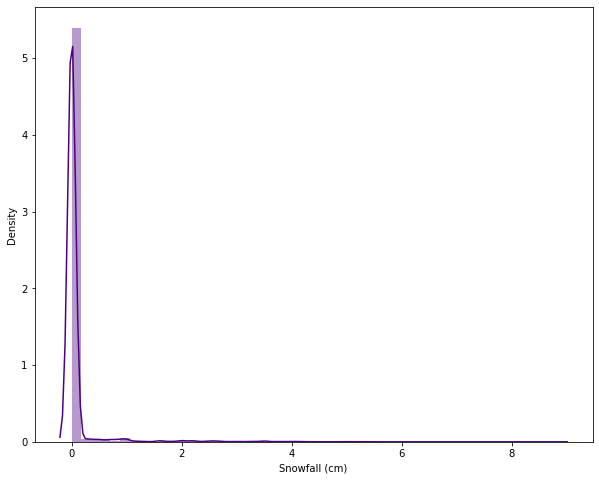

In [ ]:
# seeing the data distribution of the numerical features
numcols=df[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
n=1
for i in numcols:
  plt.subplot(9,3,n)
  plt.figure(figsize=(10,8))
  n+=1
  sns.distplot(df[i],color = 'indigo')
  plt.show()

**Observation** = As we can see, bike count is more in the year 2018 than 2017

In [ ]:
# total number of rented bike count per season
dfSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
dfSeasons

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


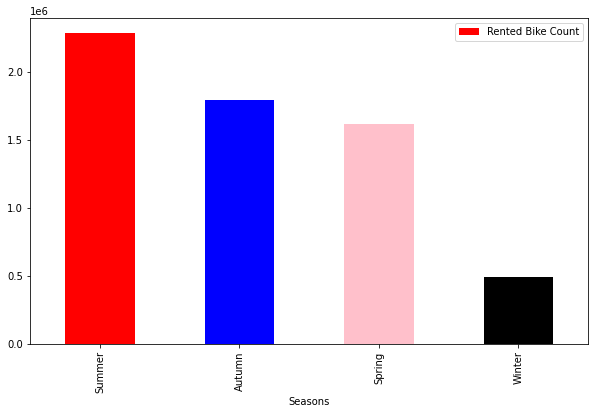

In [ ]:
dfSeasons.plot(kind='bar',color=['red','blue','pink','black'],y='Rented Bike Count')
plt.show()

**Observation** =  Bike count in the summer season is more . While in winter the count is less

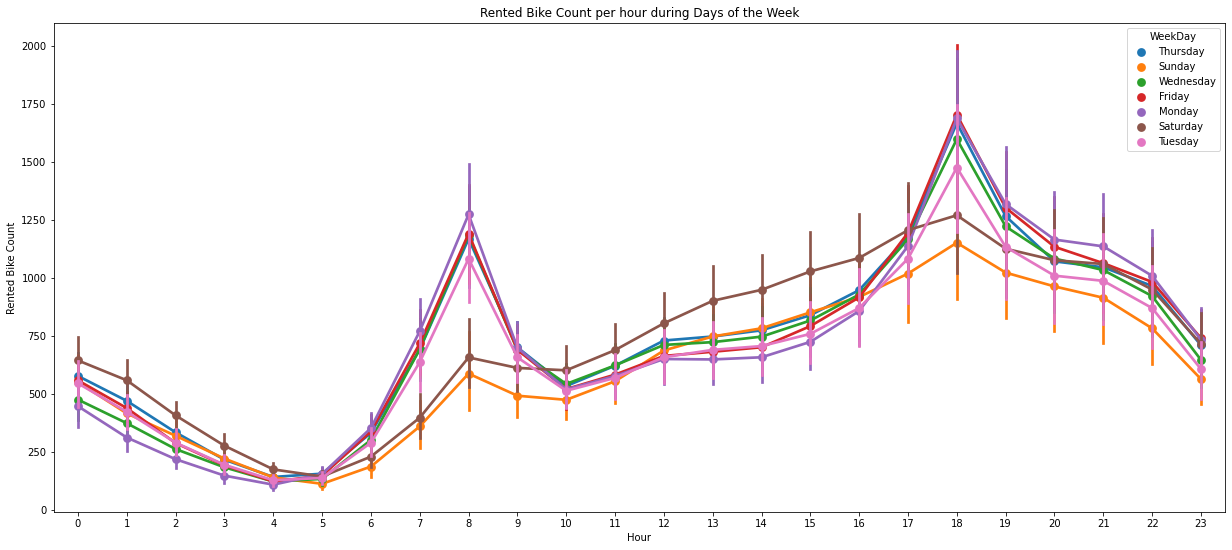

In [ ]:
#Rented Bike Count during Days of the Week
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='WeekDay',data = df,ax=ax)
ax.set(title ='Rented Bike Count per hour during Days of the Week')
plt.show()

### **Observation:**  If we closely look into this pointplot, either its weekdays or weekend, the demand for rented bike count approx starts from morning 6 am. At 8am it is high and also from 6pm.

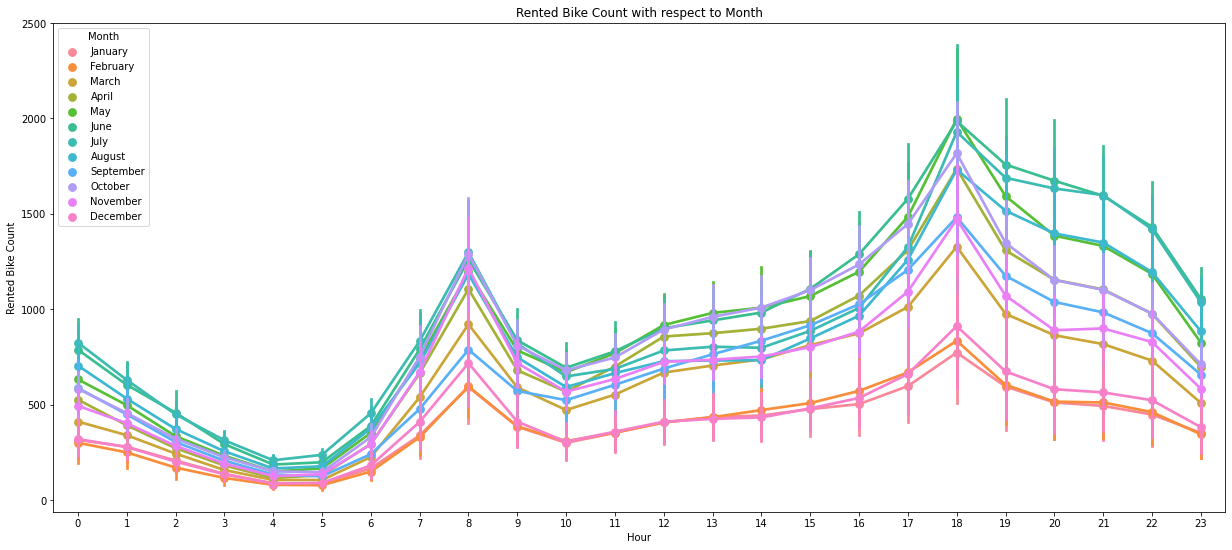

In [ ]:
# Rented bike count per day with respect to Month
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Month',data = df,ax=ax)
ax.set(title ='Rented Bike Count with respect to Month')
plt.show()

### **Observation:**  we get to know that in the month of December, January, February the demand for bike is less due to cold weather.

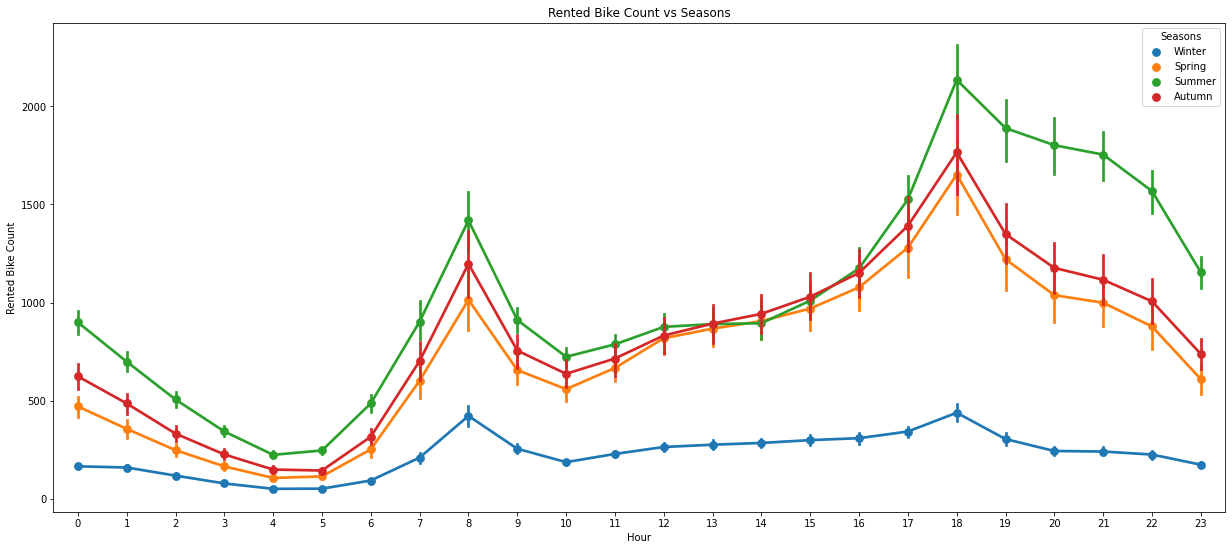

In [ ]:
# rented bike count per hour with respect to Seasons
fig,ax=plt.subplots(figsize=(21,9))
sns.pointplot(x='Hour',y='Rented Bike Count',hue='Seasons',data = df,ax=ax)
ax.set(title ='Rented Bike Count vs Seasons')
plt.show()

## **Observations**:  the demand for bike in summer is high and in winter is low.

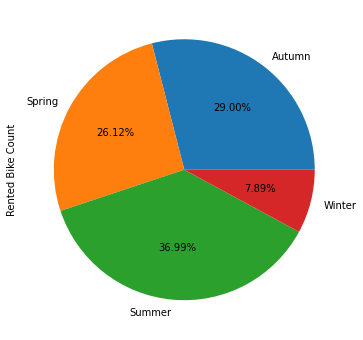

In [ ]:
# sum percentage distribution of the rented bike count with respect to seasons
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct="%.2f%%")
plt.show()

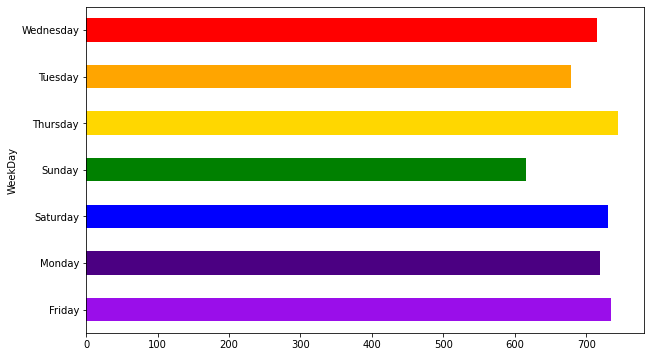

In [ ]:
# average bike count with respect to weekdays
df.groupby('WeekDay')['Rented Bike Count'].mean().plot.barh(color=['#9A0EEA','indigo','blue','green','gold','orange','red'])
plt.show()

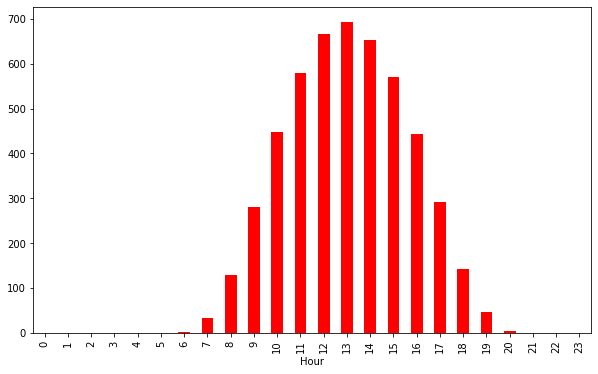

In [ ]:
# seeing the climate(sunlight) during the day
df.groupby('Hour').sum()['Solar Radiation (MJ/m2)'].plot(kind='bar', color='red',)
plt.show()

### **Observation:** As we can see that the sunlight comes at 8am and it rises it peakes in the afternoon around 1pm and gradually decreases till 6pm. That's why people mostly used rented bike during these hours.

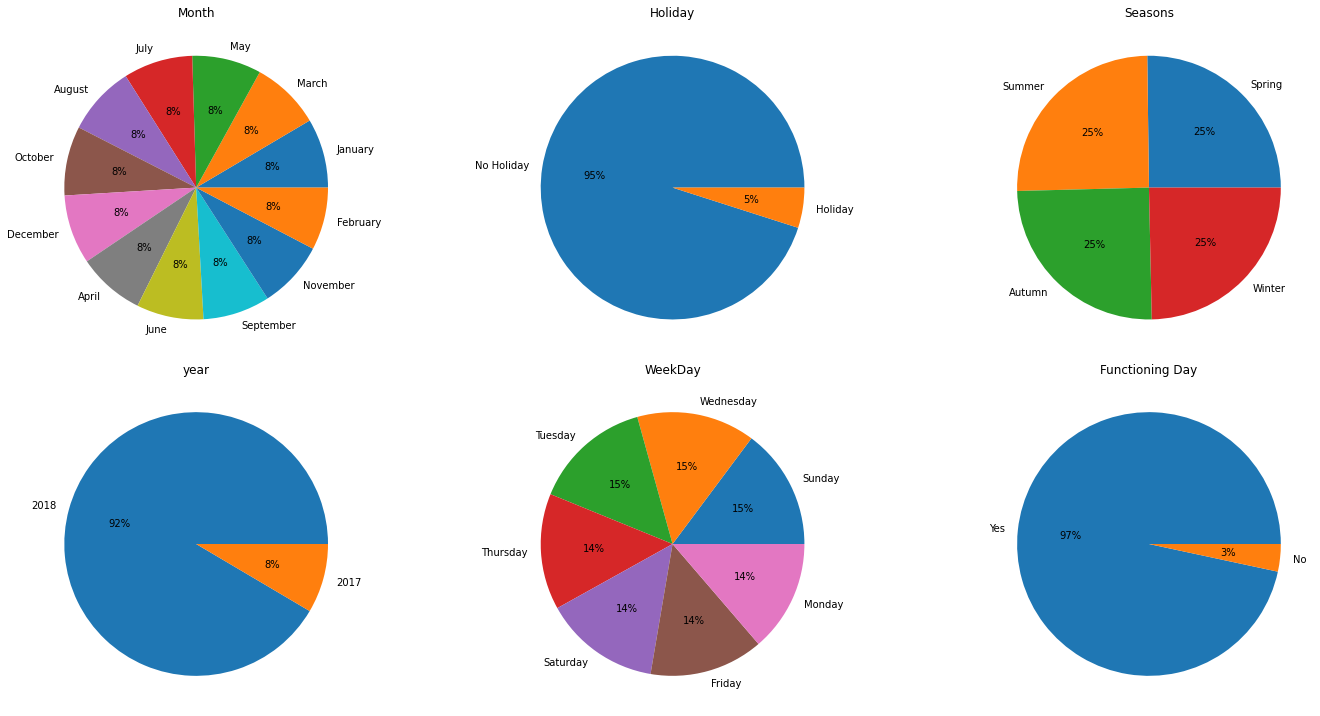

In [ ]:
# percentage distribution of the value counts of the categorical features
cols=['Month','Holiday','Seasons','year','WeekDay','Functioning Day']
n=1
plt.figure(figsize=(20,15))
for i in cols:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

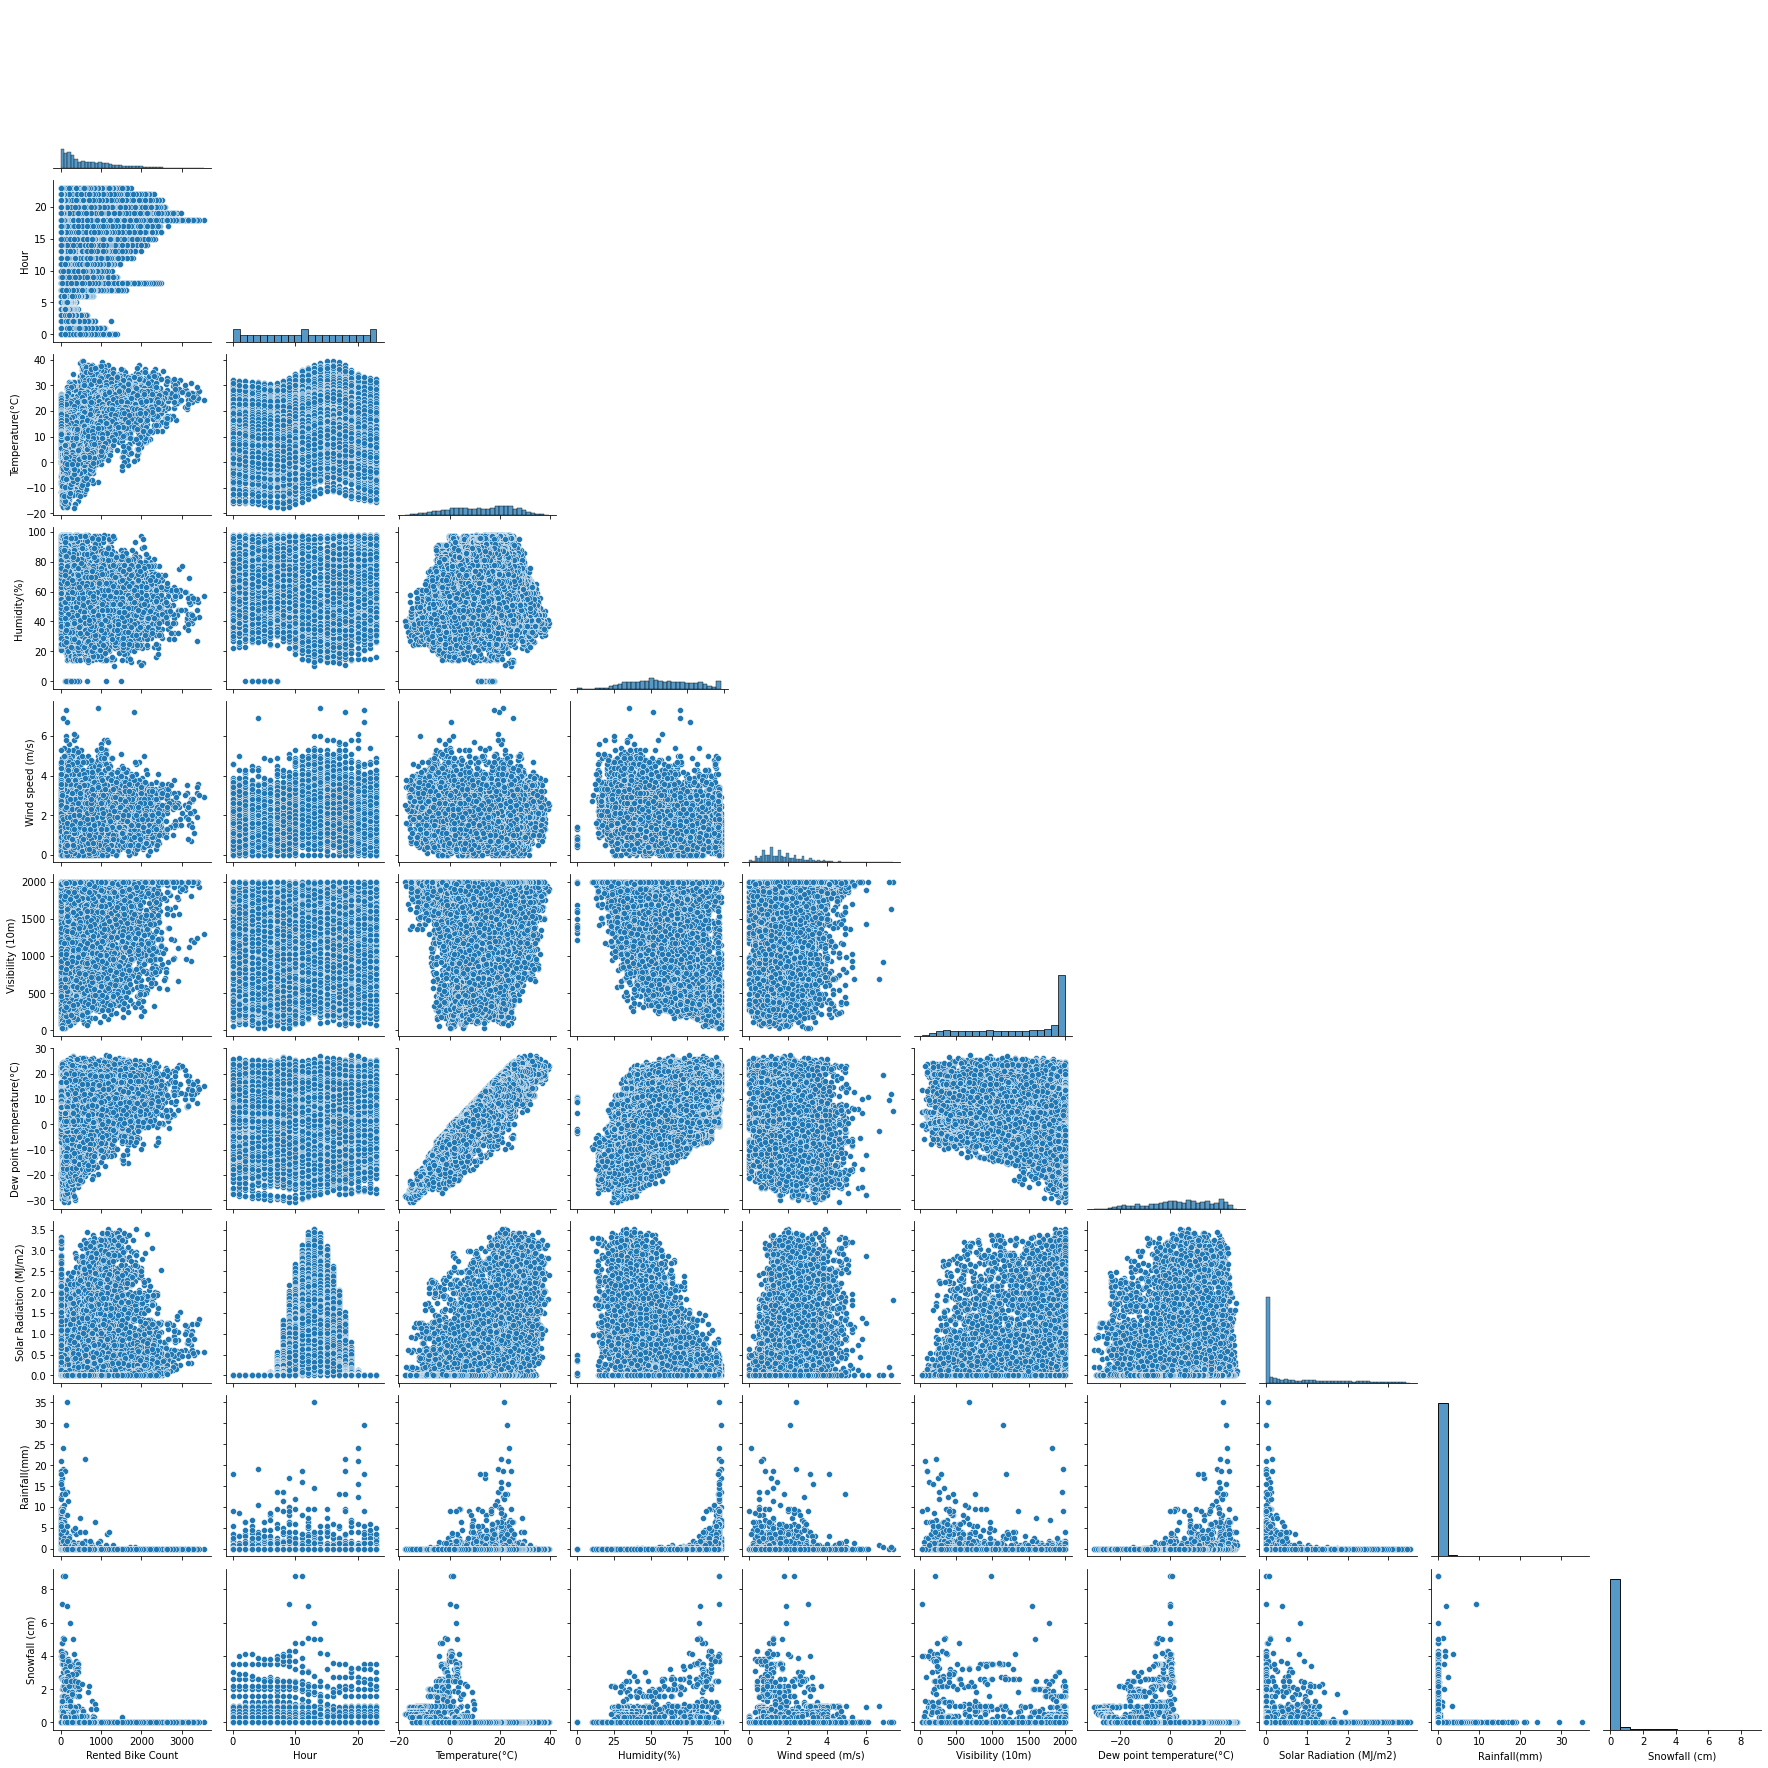

In [ ]:
# Numerical feature analysis by ploting pair plot
sns.pairplot(df,corner=True,)
plt.show()

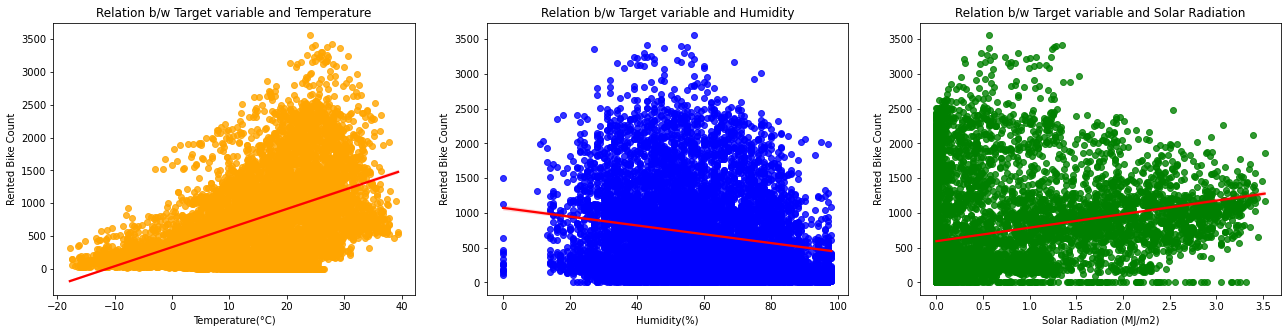

In [ ]:
# Regression Plots to know the relation between Target variable(rented bike count) and independent columns(Temperature, humidity, Solar radiation)

fig,(ax1,ax2,ax3)= plt.subplots(ncols=3, figsize = (22,5))
sns.regplot(df['Temperature(°C)'], df['Rented Bike Count'],scatter_kws={"color": "orange"}, line_kws={"color": "red"},ax=ax1)
ax1.set(title='Relation b/w Target variable and Temperature')
sns.regplot(df['Humidity(%)'], df['Rented Bike Count'],scatter_kws={"color": "blue"}, line_kws={"color": "red"},ax=ax2)
ax2.set(title='Relation b/w Target variable and Humidity')
sns.regplot(df['Solar Radiation (MJ/m2)'], df['Rented Bike Count'],scatter_kws={"color": "green"}, line_kws={"color": "red"},ax=ax3)
ax3.set(title='Relation b/w Target variable and Solar Radiation')
plt.show()

# **Correlation Matrix**

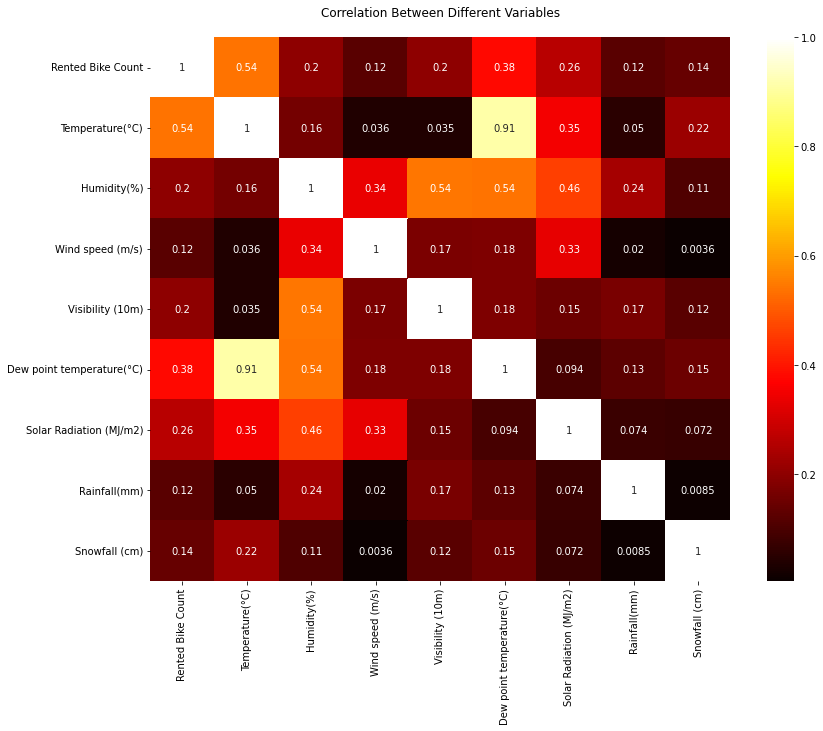

In [ ]:
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),
            cmap='hot', annot=True)     
plt.show()

### **Observation:** We can see that there is strong correlation between the temperature and dew point temperature features which may cause trouble during the prediction. We will find/detect this type of multicollinearity in a different way ahead.

In [ ]:
# watching correlation between target variable and remaining independent variable
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

### **Observation:** some features are negatively correlated and some positive with the target feature

# **Collinearity/Multicollinearity Detection**

In [ ]:
# detecting multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
attributes = df[['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["feature"] = attributes.columns 
#calculating VIF
VIF["Variance Inflation Factor"] = [variance_inflation_factor(attributes.values, i)
                          for i in range(len(attributes.columns))]
  
print(VIF)

                     feature  Variance Inflation Factor
0            Temperature(°C)                  29.075866
1  Dew point temperature(°C)                  15.201989
2                Humidity(%)                   5.069743
3           Wind speed (m/s)                   4.517664
4           Visibility (10m)                   9.051931
5    Solar Radiation (MJ/m2)                   2.821604
6               Rainfall(mm)                   1.079919
7              Snowfall (cm)                   1.118903


**Observation** = As we can see that Temperature and Dew point temperature has high VIF.

Let's see the VIF after removing dew point temperature feature from the list.

In [ ]:
# VIF after removing the dew point temperature feature.

attributes = df[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
VIF = pd.DataFrame()
VIF["feature"] = attributes.columns 
#calculating VIF
VIF["Variance Inflation Factor"] = [variance_inflation_factor(attributes.values, i)
                          for i in range(len(attributes.columns))]
print(VIF)

                   feature  Variance Inflation Factor
0          Temperature(°C)                   3.166007
1              Humidity(%)                   4.758651
2         Wind speed (m/s)                   4.079926
3         Visibility (10m)                   4.409448
4  Solar Radiation (MJ/m2)                   2.246238
5             Rainfall(mm)                   1.078501
6            Snowfall (cm)                   1.118901


**Observation**  = Now the VIF score is normal which is between 1 - 5.

## **Therefore we decided that it is better to remove the dew point temperature feature from the dataset.**

In [ ]:
# dropping the dew point temperature feature
df=df.drop(['Dew point temperature(°C)'],axis=1)

# **Preparing for Data Modelling**

# **encoding process**

In [ ]:
#encoding the categorical features.
final_df=pd.get_dummies(df,drop_first=True,sparse=True)
final_df.head(3).T

,0,1,2
Rented Bike Count,254.0,204.0,173.0
Temperature(°C),-5.2,-5.5,-6.0
Humidity(%),37.0,38.0,39.0
Wind speed (m/s),2.2,0.8,1.0
Visibility (10m),2000.0,2000.0,2000.0
Solar Radiation (MJ/m2),0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0
Hour_1,0.0,1.0,0.0
Hour_2,0.0,0.0,1.0


# **dividing the data**

In [ ]:
# dividing the data into dependent variable(target) and independent variable
X = final_df.drop('Rented Bike Count',axis=1) # Independent features
y = np.sqrt(final_df['Rented Bike Count'])  # dependent features

# **train_test_split**

In [ ]:
# importing required library
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split the data.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,year_2018
2223,16.0,14,2.2,1828,2.33,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
798,-6.7,48,2.4,1991,0.00,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7752,11.3,71,1.2,1997,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
734,3.0,28,3.8,1956,1.10,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2881,11.5,77,2.0,593,0.00,0.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,year_2018
6056,27.2,69,1.8,1999,0.70,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5556,32.6,51,2.1,800,3.21,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5990,34.0,50,1.2,1744,1.68,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7674,16.9,47,1.4,1637,0.11,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3319,6.4,51,1.0,1398,0.19,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 53), (2190, 53), (6570,), (2190,))

# **Model Training**

In [ ]:
# importing the models from sklearn library
from sklearn import model_selection
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor


# import evaluating metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#**Defining functions for finding metrics**

In [ ]:
# Appending all models evalution scores to the corrosponding list after hyperarameter
MSE_ht=[]
RMSE_ht=[]
training_score_ht =[]
R2_ht=[]
ADJ_R2_ht=[]

In [ ]:
#defining a function for training the model and also the calculating the evaluation metrics
def eval_metric(model_name,X_train,X_test,y_train,y_test,linear = False):
  '''

    Defining the function to find the all evaluating metric scores

  '''  
  model_name.fit(X_train,y_train) #...fitting the model
  tr = model_name.score(X_train,y_train)#....to see the training set score
  print("Training_score =", tr)
  try:
    print("The best parameters is",model_name.best_params_)
  except:
    print('None')
  if linear == True:
    Y_pred = model_name.predict(X_test)
    mse  = mean_squared_error(y_test**2,Y_pred**2) #......... mean_squared_error
    print("MSE :" , mse)
    
    rmse = np.sqrt(mse) #..........root mean squared error
    print("RMSE :" ,rmse)
   
    r2 = r2_score(y_test**2,Y_pred**2)  #.......... r2 score
    print("R2 :" ,r2)
    
    adj_r2=1-(1-r2_score(y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))  # ........adjusted r2 score
    print("Adjusted_R2 : ",adj_r2,'\n')
  else:
     
    Y_pred = model_name.predict(X_test)#.......for tree based models

    mse  = mean_squared_error(y_test,Y_pred)
    print("MSE :" , mse)

    rmse = np.sqrt(mse)
    print("RMSE :" ,rmse)
    
    r2 = r2_score(y_test,Y_pred)
    print("R2 :" ,r2)
   
    adj_r2=1-(1-r2_score(y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')


  #appending all metrics for all models
  MSE_ht.append(mse)
  RMSE_ht.append(rmse)  
  R2_ht.append(r2)
  ADJ_R2_ht.append(adj_r2)
  training_score_ht.append(tr)

  if model_name == Lr:
    
    print('Coefficient:',model_name.coef_) #  ..... Coeff of linear model
    print('\n')
    print('Intercept:',model_name.intercept_) # ......intercept of linear model
  else:
    pass
  

In [ ]:
# Feature transformation using Yeo Johnson transformation technique
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
powertrans_ = PowerTransformer()
X_train_trans = powertrans_.fit_transform(X_train) #........ fit transform the training set
X_test_trans = powertrans_.transform(X_test)

# **All Models without hyperparameter tuning** 

In [ ]:
MSE=[]
RMSE=[]
training_score =[]
R2=[]
ADJ_R2=[]

# assigning models in variables
lr= LinearRegression()
l2 = Ridge()
l1 = Lasso()


linear_models = [lr,l1,l2]
for model_name in linear_models:
  model_name.fit(X_train_trans,y_train)
  y_pred = model_name.predict(X_test_trans)
  mse1 = mean_squared_error(y_test,y_pred)
  rmse1 = np.sqrt(mse1)
  r21 = r2_score(y_test,y_pred)
  ad_r21 =1-(1-r21)*((X_test_trans.shape[0]-1)/(X_test_trans.shape[0]-X_test_trans.shape[1]-1))

  training_score.append(model_name.score(X_train_trans,y_train))
  MSE.append(mse1)
  RMSE.append(rmse1)
  R2.append(r21)
  ADJ_R2.append(ad_r21)

In [ ]:
training_score

[0.7955285090489645, 0.6632196692317207, 0.7955284274012661]

# **Linear Models with Hyperparameter Tuning**

### **Linear Regression**

In [ ]:
Lr =LinearRegression()

In [ ]:
# Fitting the linear regression model into defined function
eval_metric(Lr,X_train,X_test,y_train,y_test,linear = True)

Training_score = 0.7649817727209842
None
MSE : 110046.22396430717
RMSE : 331.73215696448113
R2 : 0.7310704800721934
Adjusted_R2 :  0.7243976034073181 

Coefficient: [ 4.55311201e-01 -1.36843465e-01 -1.50077256e-01  4.16728307e-04
  1.02287666e+00 -1.92212177e+00 -1.02844986e-01 -1.84288884e+00
 -4.90385878e+00 -7.34928597e+00 -9.58086833e+00 -9.27260139e+00
 -4.56610113e+00  1.81959307e+00  7.13010309e+00  1.09585794e+00
 -3.28954218e+00 -3.49772135e+00 -2.77732352e+00 -2.87356480e+00
 -2.96877049e+00 -1.83207803e+00  1.65055530e-01  4.33965936e+00
  1.02284856e+01  7.21736794e+00  6.74468805e+00  6.49996588e+00
  5.34720082e+00  1.76145500e+00 -3.00147264e+00 -3.20700537e+00
 -7.80202703e+00  2.88290574e+00  2.86532709e+01 -3.29934054e-01
 -5.60764277e-01 -1.45769516e+00 -4.86261009e-01 -6.68935750e-01
 -6.12575849e-02 -8.47309352e-01  2.20387827e-01 -4.06954493e-01
  3.51148683e-01 -2.12209661e-01  4.07570298e+00  1.71404282e-01
  1.34453546e+00  6.95683797e-01  2.00533964e+00  1.149

## **Regularization = Lasso**

In [ ]:
# using grid search CV for hyperparameter tuning of LASSO
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters 
L_lasso = GridSearchCV(Lasso(), parameters, cv=5) #using gridsearchcv and cross validate the model

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(L_lasso,X_train,X_test,y_train,y_test,linear = True)

Training_score = 0.7649593144823714
The best parameters is {'alpha': 0.0014}
MSE : 110260.06053258084
RMSE : 332.0543035899111
R2 : 0.730547909069053
Adjusted_R2 :  0.7238620659888375 



# **Regularizaion = Ridge**

In [ ]:
# using grid search CV for hyperparameter tuning of RIDGE
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters 
L_ridge = GridSearchCV(Ridge(), parameters, scoring='r2', cv=5)

In [ ]:
# Fitting the Ridge model into the defined metric function
eval_metric(L_ridge,X_train,X_test,y_train,y_test,linear = True)

Training_score = 0.7649735244427949
The best parameters is {'alpha': 1}
MSE : 110233.80397746476
RMSE : 332.0147646979947
R2 : 0.7306120744943438
Adjusted_R2 :  0.7239278235337634 



#**Polynomial**

### **With polynomial degree 2**

In [ ]:
polynomial_2 = PolynomialFeatures(2) #........creating variable with degree 2
poly_X_train2 = polynomial_2.fit_transform(X_train_trans) #........ fitting the train set
poly_X_test2 = polynomial_2.transform(X_test_trans) #.........transforming the test set

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(Lr,poly_X_train2,poly_X_test2,y_train,y_test,linear = True)

Training_score = 0.9351428332867241
None
MSE : 45983.51318490861
RMSE : 214.43766736492125
R2 : 0.887626093109543
Adjusted_R2 :  0.6505873832624852 

Coefficient: [-7.63305557e+08  2.38891971e+00 -1.51584910e+00 ... -5.10431460e+11
 -2.92816162e-01 -5.70517845e+11]


Intercept: -784851772856.149


# **Now,** **Tree Based Models without Hyperparameter**

In [ ]:
# Feature scaling
scaling = MinMaxScaler()

In [ ]:
X_train_scaled  = scaling.fit_transform(X_train) #......fitting the X_train
X_test_scaled  = scaling.transform(X_test) # transform test set

In [ ]:
#assigning the models into new variables
d_tree= DecisionTreeRegressor()
r_forest = RandomForestRegressor()
g_boost = GradientBoostingRegressor()
xt_boost = ExtraTreesRegressor()

tree_models = [d_tree,r_forest,g_boost,xt_boost]
for model_name in tree_models:
  model_name.fit(X_train_scaled,y_train)
  y_pred = model_name.predict(X_test_scaled)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_pred)
  ad_r2 =1-(1-r2)*((X_test_scaled.shape[0]-1)/(X_test_scaled.shape[0]-X_test_scaled.shape[1]-1))
#appending the metrics into pre defined metric variables
  training_score.append(model_name.score(X_train_scaled,y_train))
  MSE.append(mse)
  RMSE.append(rmse)
  R2.append(r2)
  ADJ_R2.append(ad_r2)

# **Creating Dataframe of all metrics without hyperparameter tuning**

In [ ]:
# all models into a list and storing in a new variable
models = ['Linear Regression','Ridge','Lasso','Decision_Tree','Random_Forest','Gradient_boost','ExtraTreeReg']

# Creating dictionary of evaluating metrics by creating new names
metrics = {'TRAININGSCORE':training_score,'MSE':MSE,'RMSE':RMSE,'R2':R2,'ADJ_R2':ADJ_R2}

# creating the dataframe of all metrics without hyperparameter tuning
metrics_df = pd.DataFrame.from_dict(metrics,orient='index',columns=models)


In [ ]:
metrics_df.T

,TRAININGSCORE,MSE,RMSE,R2,ADJ_R2
Linear Regression,0.795529,30.516904,5.524211,0.798363,0.793360
Ridge,0.663220,49.511948,7.036473,0.672855,0.664738
Lasso,0.795528,30.517397,5.524255,0.798359,0.793356
Decision_Tree,1.000000,27.183717,5.213801,0.820386,0.815930
Random_Forest,0.986032,14.823501,3.850130,0.902055,0.899625
Gradient_boost,0.862500,22.566025,4.750371,0.850897,0.847198
ExtraTreeReg,1.000000,12.898978,3.591515,0.914771,0.912657


# **Tree Models with Hyperparameter Tuning**

## **DecisionTreeRegressor**

In [ ]:
# Parameters for Decission Tree model
parameters = {'criterion':['mse'],#'squared_error', 'absolute_error',],
              'min_samples_leaf':[5],#7,10],
              'max_depth' : [18],#10,25],
              'min_samples_split': [25],#15,35],
              'max_features':['auto'],#'sqrt','log2']
              }

### we put other parameters under comments as we found the best parameters among them.

In [ ]:
# using grid search CV
D_tree = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,cv=5,n_jobs=-1)

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(D_tree,X_train_scaled,X_test_scaled,y_train,y_test)

Training_score = 0.8914489364121182
The best parameters is {'criterion': 'mse', 'max_depth': 18, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 25}
MSE : 23.800367944024142
RMSE : 4.87856207750031
R2 : 0.8427415305839335
Adjusted R2 :  0.8388395180001079 



##**RandomForestRegressor**

In [ ]:
parameterss = {'n_estimators':[150],#100,200],
              'min_samples_leaf':[4],#6,2],
              'max_depth' : [20],#25,30],
              'min_samples_split': [25],#30,20],
              'max_features':['auto'],#'sqrt','log2']
              }

In [ ]:
# using grid search cv for hyperparameter
Random_forest_= GridSearchCV(RandomForestRegressor(),param_grid=parameterss,n_jobs=-1,cv=5)

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(Random_forest_,X_train_scaled,X_test_scaled,y_train,y_test)

Training_score = 0.9188958293231096
The best parameters is {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 25, 'n_estimators': 150}
MSE : 17.471054131821013
RMSE : 4.17983900788308
R2 : 0.8845618169300085
Adjusted R2 :  0.8816974799905377 



## **GradientBoostingRegressor**

In [ ]:
parametersss={'loss':['huber'],#'squared_error', 'absolute_error','quantile'],
            'min_impurity_decrease':[0.4],#0.2,0.6],
            'criterion':['mse'],#'mae'],
            'n_estimators':[800],#600,400,1000], 
            'learning_rate': [0.01],#0.03,0.1,0.05], 
            'min_samples_leaf':[6],#4,8]
            'max_depth':[25],#15,20,30],
            'subsample':[0.7],#0.5,1.0],
            'max_leaf_nodes':[17],#15,10,20],
            'max_features':['auto']#'sqrt', 'log2'] 
            }
            
            

In [ ]:
gradient_boost_ = GridSearchCV(GradientBoostingRegressor(), param_grid=parametersss, n_jobs=-1,cv=5,verbose=2)

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(gradient_boost_,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training_score = 0.8294754450478531
The best parameters is {'criterion': 'mse', 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 6, 'n_estimators': 800, 'subsample': 0.7}
MSE : 26.934568125139496
RMSE : 5.189852418435374
R2 : 0.8220326270709728
Adjusted R2 :  0.8176167699711421 



#**ExtraTreesRegressor**

In [ ]:
param = {'n_estimators' : [100], 
         'max_depth' : [50],#60,70,80,90,100],
         'min_samples_split':[2],
         'min_samples_leaf':[1],
         'bootstrap' : [True],#False]
        }

# using grid search cv for hyperparameter
ExtraTrees_=GridSearchCV(ExtraTreesRegressor(),param_grid=param,n_jobs=-1,cv=5)
# fitting and calculating metric by calling the defined function
eval_metric(ExtraTrees_,X_train_scaled,X_test_scaled,y_train,y_test)

Training_score = 0.9873048013097709
The best parameters is {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE : 13.348448110979733
RMSE : 3.6535528066499507
R2 : 0.9118015097939056
Adjusted R2 :  0.9096130641099529 



In [ ]:
# all models into a list and storing in a new variable
models_ht = ['Linear Regression','Ridge','Lasso','Polynomial','Decision_Tree','Random_Forest','Gradient_boost','ExtraTreesReg']
# Creating dictionary of evaluating metrics by creating new names
metrics_ht = {'TRAININGSCORE(ht)':training_score_ht,'MSE(ht)':MSE_ht,'RMSE(ht)':RMSE_ht,'R2(ht)':R2_ht,'ADJ_R2(ht)':ADJ_R2_ht}
# creating the dataframe of all metrics with hyperparameter tuning
metrics_df_ht = pd.DataFrame.from_dict(metrics_ht,orient='index',columns=models_ht)

In [ ]:
# sorting dataframe by adj_r2(ht)
T_ht = metrics_df_ht.T.sort_values('ADJ_R2(ht)',ascending=False)

In [ ]:
T_ht

,TRAININGSCORE(ht),MSE(ht),RMSE(ht),R2(ht),ADJ_R2(ht)
ExtraTreesReg,0.987305,13.348448,3.653553,0.911802,0.909613
Random_Forest,0.918896,17.471054,4.179839,0.884562,0.881697
Decision_Tree,0.891449,23.800368,4.878562,0.842742,0.838840
Gradient_boost,0.829475,26.934568,5.189852,0.822033,0.817617
Linear Regression,0.764982,110046.223964,331.732157,0.731070,0.724398
Lasso,0.764974,110233.803977,332.014765,0.730612,0.723928
Ridge,0.764959,110260.060533,332.054304,0.730548,0.723862
Polynomial,0.935143,45983.513185,214.437667,0.887626,0.650587


# **Observation:** 1) After hyperparameter tuning, we can consider the top three model but among them the best model is the **Extra Trees regressor** with a **R2 score of 0.91573** and **ADJ_R2 score of 0.909379**

In [ ]:
# again training the ExtraTreesRegressor model to check the error between test data and predicted data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
# fitting the extratreeregressor model
model_best = ExtraTreesRegressor()
model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test) 

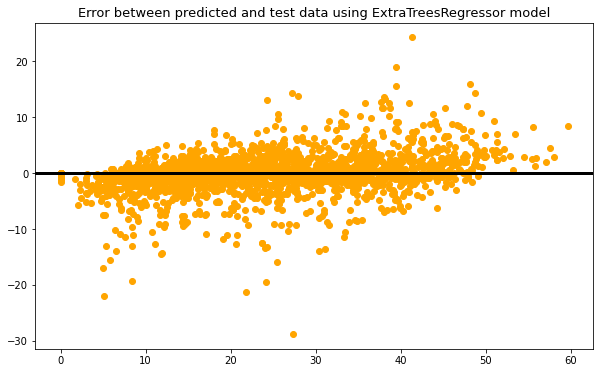

In [ ]:
# visualizing the error
error = y_test - y_pred
fig,ax =plt.subplots()
ax.scatter(y_test,error,color='orange')
ax.axhline(lw=3,color='black')
plt.title("Error between predicted and test data using ExtraTreesRegressor model",fontsize=13)
plt.show()

# **Observation:** we saw all model's error  b/w test and predicted data. So, among all of them, extratreesregressor gives less error compare to others

# **CONCLUSION**

In [ ]:
# fitting and calculating metric by calling the defined function
eval_metric(gradient_boost_,X_train_scaled,X_test_scaled,y_train,y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training_score = 0.8295646333722775
The best parameters is {'criterion': 'mse', 'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 25, 'max_features': 'auto', 'max_leaf_nodes': 17, 'min_impurity_decrease': 0.4, 'min_samples_leaf': 6, 'n_estimators': 800, 'subsample': 0.7}
MSE : 26.939582206328744
RMSE : 5.190335461829875
R2 : 0.8219994970481428
Adjusted R2 :  0.8175828179018655 



###1) We observed that bike rental count is high during week days then weekend days.

###2) The rental bike counts are **at its peak at 8 AM** in the morning and **6pm in the evening.**

###3) We observed that people prefer to rent bikes during moderate to high temperature.

###4) Highest rental bike count is during Autumn and summer seasons and the lowest in winter season.

###5) Comparing the Adjusted R2 among all the models, **ExtarTreesRegressor** gives the highest Score where **Adjusted R2 score is  0.908699** and **Training score is 0.987167.** Therefore, this model is the best for predicting the bike rental count on hour basis





